<a href="https://colab.research.google.com/github/aravind0654/chinna/blob/master/PA_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
sns.set_style("whitegrid")

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/cs-training.csv" )

In [ ]:
train_data.shape

(150000, 12)

In [ ]:
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
train_data.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
train_data.tail()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


1. SeriousDlqin2yrs:
°  attribute indicates whether the borrower
has experienced any past dues until 90 days in the previous 2 years.
2. RevolvingUtilizationOfUnsecuredLines:
° This attribute indicates the credit card limits of the borrower after
excluding any current loan debt and real estate.
3. Age:
4. NumberOfTime30-59DaysPastDueNotWorse:
° The number of this attribute indicates the number of times borrowers
have paid their EMIs late but have paid them 30 days after the due
date or 59 days before the due date.
5. DebtRatio: If my monthly debt is 200 and my other expenditure is 500, then I
spend 700 monthly. If my monthly income is $1,000, then the value
of the DebtRatio is $700/$1,000 = 0.7000
6. MonthlyIncome:
°  monthly income of borrowers.
7. NumberOfOpenCreditLinesAndLoans:
° This attribute indicates the number of open loans and/or the number
of credit cards the borrower holds.
8. NumberOfTimes90DaysLate:
° This attribute indicates how many times a borrower has paid their
dues 90 days after the due date of their EMIs.
9. NumberRealEstateLoansOrLines:
° This attribute indicates the number of loans the borrower holds for
their real estate or the number of home loans a borrower has.
10. NumberOfTime60-89DaysPastDueNotWorse:
° This attribute indicates how many times borrowers have paid their
EMIs late but paid them 60 days after their due date or 89 days before
their due date.
11. NumberOfDependents:
° This attribute is self-explanatory as well. It indicates the number
of dependent family members the borrowers have. The dependent
count is excluding the borrower

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
train_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


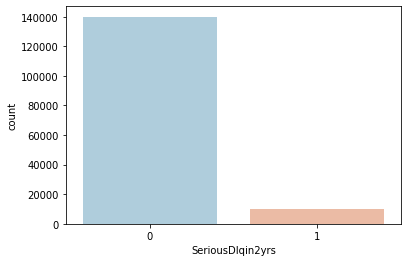

In [ ]:
sns.countplot(x = train_data['SeriousDlqin2yrs'], data = train_data, palette=  "RdBu_r")

In [ ]:
delinquency     = train_data[train_data['SeriousDlqin2yrs'] == 1]
no_delinquency  = train_data[train_data['SeriousDlqin2yrs'] == 0]

print(delinquency.shape, no_delinquency.shape)

(10026, 11) (139974, 11)


this indicates that the borrowers with Serious Delinquency in 2 years are very low compared to the total borrowers.
So, this is a skewed or imbalanced  dataset in which one target class label is highly dominating the other class label.


 we do some some basic Exploratory data analysis

In [ ]:
train_data.isnull().sum() #gives the attribute wise null values in the daatset

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

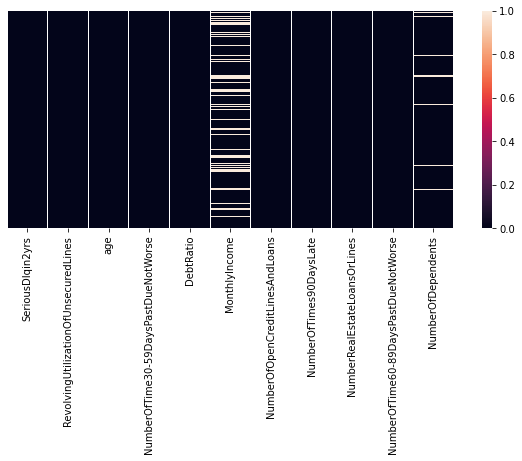

In [ ]:
plt.figure(figsize = (10,4))
sns.heatmap(train_data.isnull(), yticklabels=False)

there are null values in Monthly Income and Number of Dependents, the former NaN values can be filled with mean of that attribute and the later can be with the median

In [ ]:
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].mean())
train_data['NumberOfDependents'] = train_data['NumberOfDependents'].fillna(train_data['NumberOfDependents'].median())

In [ ]:
train_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


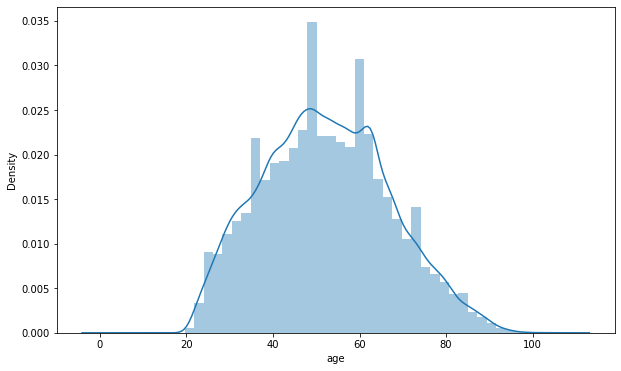

In [ ]:
plt.figure(figsize = (10,6))
#data['age'].hist(bins = 30, color = "darkred")
sns.distplot(train_data['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


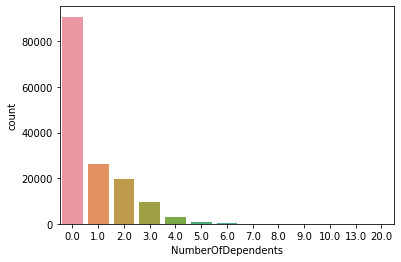

In [ ]:
sns.countplot(train_data['NumberOfDependents'], data  = train_data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


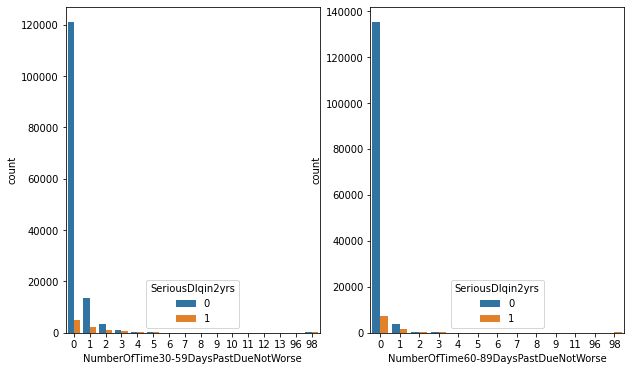

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(train_data['NumberOfTime30-59DaysPastDueNotWorse'], hue = 'SeriousDlqin2yrs', data = train_data)

plt.subplot(1,2,2)
sns.countplot(train_data['NumberOfTime60-89DaysPastDueNotWorse'], hue = 'SeriousDlqin2yrs', data = train_data)

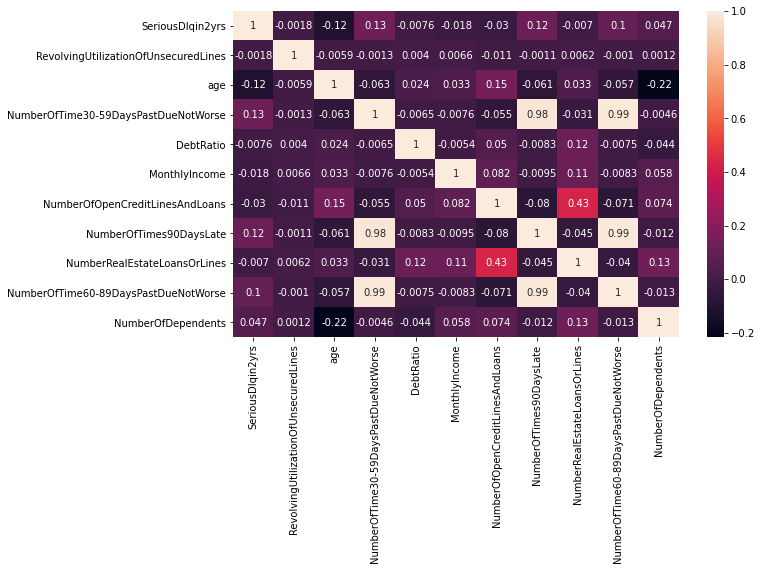

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(train_data.corr(), annot = True)

1. there is a high correlation between NumberOfTime30-59DaysPastDuebutNotWorse and NumberOfTime60-89DaysPastDuebutNotWorse
2. there is a high correlation between NumberOfTimes90DaysLate and NumberOfTime30-59DaysPastDuebutNotWorse
3. there is a high correlation between NumberOfTimes90DaysLate and NumberOfTime 60-89DaysPastDuebutNotWorse

In [ ]:
import collections
collections.Counter(train_data.age)

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

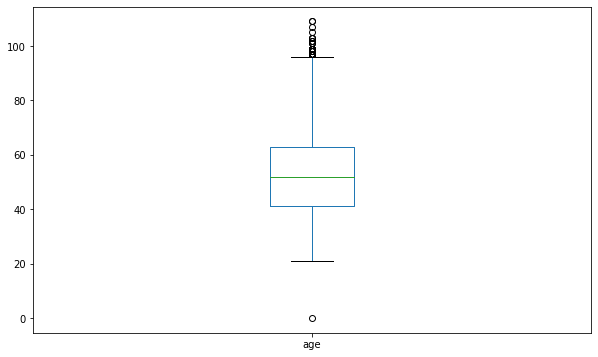

In [ ]:
plt.figure(figsize = (10,6))
train_data['age'].plot.box()

there are some outliers in age

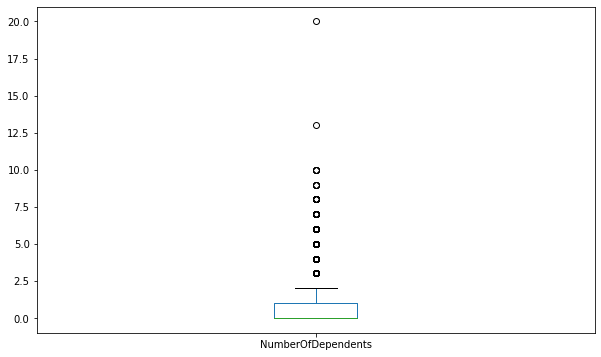

In [ ]:
plt.figure(figsize = (10,6))
train_data['NumberOfDependents'].plot.box()

there are many outliers in number of dependents

In [ ]:
collections.Counter(train_data['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

1. there are 5 borrowers who paid the credit card bill between 30-59 days after the due date 96 times
2. there are 264 borrowers who paid the credit card bill between 30-59 days after the due date 98 times
3. probably they were outliers or the one who are Seriously Deliquent as Credit card Defaulters prediction itself is a problem of outliers prediction

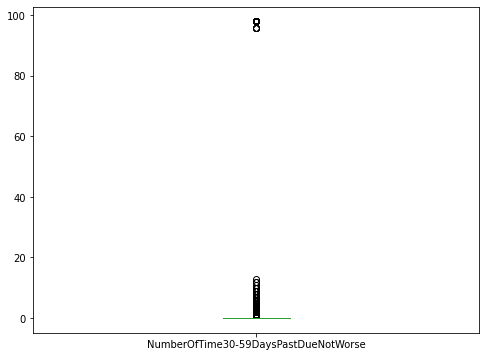

In [ ]:
plt.figure(figsize = (8,6))
train_data['NumberOfTime30-59DaysPastDueNotWorse'].plot.box() # for better visualization we should plot this for people who have serious delinquency

In [ ]:
collections.Counter(train_data['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [ ]:
X_train = train_data.drop('SeriousDlqin2yrs', axis = 1)
y_train = np.array(train_data['SeriousDlqin2yrs'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)**.
**Standardize features by removing the mean and scaling to unit variance**

In [ ]:
X_train_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [ ]:
X_train = pd.DataFrame(X_train)

In [ ]:
forest = RandomForestClassifier(n_estimators=100)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importances = forest.feature_importances_
importances

array([0.19232663, 0.12707946, 0.04812223, 0.17743878, 0.14815886,
       0.08920661, 0.09220135, 0.03462479, 0.04861403, 0.04222725])

<Figure size 720x720 with 0 Axes>

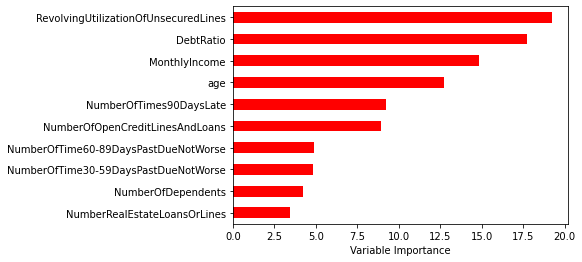

In [ ]:
plt.figure(figsize = (10,10))
Importance = pd.DataFrame({'Importance':importances*100}, index=X_train_columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

RevolvingUtilizationOfUnsecuredLines and DebtRatio , MonthlyIncome are comparatively important features in predicting the target class "SeriousDelinqIn2Years'

In the below codes, we can see why predictive models directly applied on this dataset gives mislead results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

sgd_clf.fit(X_train_1, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.**

In [ ]:
y_train_1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict

y_pred  = cross_val_predict(sgd_clf, X_train_1, y_train_1, cv = 3)

print(confusion_matrix(y_train_1, y_pred))
print("\n")
print(classification_report(y_train_1,y_pred))

[[93671    56]
 [ 6709    64]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     93727
           1       0.53      0.01      0.02      6773

    accuracy                           0.93    100500
   macro avg       0.73      0.50      0.49    100500
weighted avg       0.91      0.93      0.90    100500



**quite a bad precision and recall. the model is unable to predict the borrowers who have serious credit card delinquency in 2 years which is the objective of our problem**

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train,cv = 10, scoring = "accuracy")

array([0.9334    , 0.93293333, 0.933     , 0.93306667, 0.9332    ,
       0.93313333, 0.9336    , 0.9332    , 0.93326667, 0.93373333])

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy on Cross-validation :",cross_val_score(sgd_clf, X_train, y_train,cv = 5, scoring = "accuracy"))
print("\n")
print("precision_score:",precision_score(y_train_1, y_pred))
print("\n")
print("recall_score:",recall_score(y_train_1,y_pred))
print("\n")
print("f1score:", f1_score(y_train_1, y_pred))

Accuracy on Cross-validation : [0.93316667 0.93306667 0.9331     0.93316667 0.93316667]


precision_score: 0.5333333333333333


recall_score: 0.009449283921452828


f1score: 0.018569563325112434


VERy BAd
We can see that although cross-val accuracy is quite satisfactory, **precision recall scores are below-par**. 
Therefore, accuracy isn't only the metric for generalization of the model.







In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall , thresholds = precision_recall_curve(y_train_1, y_pred)

In [ ]:
precision

array([0.06739303, 0.53333333, 1.        ])

In [ ]:
thresholds

array([0, 1])

In [ ]:
recall

array([1.        , 0.00944928, 0.        ])

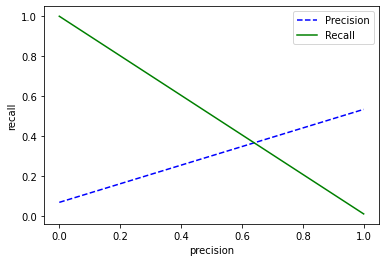

In [ ]:
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
  plt.plot(thresholds, precision[:-1], "b--",label = "Precision")
  plt.plot(thresholds, recall[:-1], "g-", label = "Recall")  

plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_1, y_pred)

In [ ]:
fpr

array([0.00000000e+00, 5.97479915e-04, 1.00000000e+00])

In [ ]:
tpr

array([0.        , 0.00944928, 1.        ])

In [ ]:
y_train[456]

0

In [ ]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

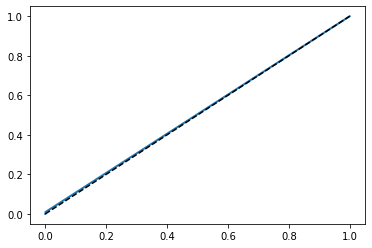

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
   

plot_roc_curve(fpr, tpr)
plt.show()

*Reasons for our model making poor predictions are*
 **the dataset is a skewed one which has about 140000 rows of no serious delinquency and only 10000 rows of serious delinquency. therefore, our model is trained well on *"no serios delinquency"* and poorly trained on "serious delinquency " **
there are many methods for dealing such datasets
1. **UnderSampling**
it will copy of all the less numbered lables, in our case about 10000 of "serious delinquency and only takes 10000 of "no serious delinquncy" labels
2. **Oversampling**
it will copy all 140000 rows of "no serious delinquncy" labels and clone the 10000 rows of "serious delinquency" upto 140000 rows.
  **this is comparatively better method than Undersampling**
3. **combining both undersampling and oversampling**
combines both undersampling and oversampling and improves the **computational power**


In [ ]:
delinquency     = train_data[train_data['SeriousDlqin2yrs'] == 1]
no_delinquency  = train_data[train_data['SeriousDlqin2yrs'] == 0]

print(delinquency.shape, no_delinquency.shape)

(10026, 11) (139974, 11)


In [ ]:
from imblearn.under_sampling import NearMiss  #imbalnced learning 

nm = NearMiss(random_state = 42)

X_us, y_us = nm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
from collections import Counter
print("Original data shape{}".format(Counter(y_train)))
print("Undersampled data shape{}".format(Counter(y_us)))

Original data shapeCounter({0: 139974, 1: 10026})
Undersampled data shapeCounter({0: 10026, 1: 10026})


In [ ]:
print(X_us.shape,y_us.shape)

(20052, 10) (20052,)


In [ ]:
X_train_us, X_test_us,y_train_us, y_test_us = train_test_split(X_us, y_us, test_size = 0.30)

In [ ]:
forest.fit(X_train_us, y_train_us)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_forest = forest.predict(X_test_us)

print(confusion_matrix(y_test_us,y_pred_forest))
print("\n")
print(classification_report(y_test_us, y_pred_forest))

[[2747  228]
 [ 414 2627]]


              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2975
           1       0.92      0.86      0.89      3041

    accuracy                           0.89      6016
   macro avg       0.89      0.89      0.89      6016
weighted avg       0.89      0.89      0.89      6016



Quite improvement in precision and recall but not the best one. We limimted our training set size  from 150000 rows to 20000 rows which reduces training. the curve is definitely under-fitted. Undersampling works for a very large dataset

**OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_os, y_os = smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Original data shape{}".format(Counter(y_train)))
print("Oversampled data shape{}".format(Counter(y_os)))

Original data shapeCounter({0: 139974, 1: 10026})
Oversampled data shapeCounter({1: 139974, 0: 139974})


In [ ]:
X_train_os, X_test_os,y_train_os, y_test_os = train_test_split(X_os, y_os, test_size = 0.30)

In [ ]:
forest.fit(X_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds = forest.predict(X_test_os)

In [ ]:
print(confusion_matrix(y_test_os, y_preds))
print("\n")
print(classification_report(y_test_os, y_preds))

[[39951  2415]
 [ 3029 38590]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.94     42366
           1       0.94      0.93      0.93     41619

    accuracy                           0.94     83985
   macro avg       0.94      0.94      0.94     83985
weighted avg       0.94      0.94      0.94     83985



Quite an improvement from undersampling

**COMBINING BOTH OVERFITTING AND UNDERFITTING**

In [ ]:
from imblearn.combine import SMOTETomek

stm = SMOTETomek(random_state = 101)

In [ ]:
X_combine, y_combine = stm.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("Original data shape{}".format(Counter(y_train)))
print("Combined data shape{}".format(Counter(y_combine)))

Original data shapeCounter({0: 139974, 1: 10026})
Combined data shapeCounter({1: 137569, 0: 137569})


In [ ]:
X_train_com, X_test_com,y_train_com, y_test_com = train_test_split(X_combine, y_combine, test_size = 0.30)

In [ ]:
forest.fit(X_train_com, y_train_com)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = forest.predict(X_test_com)

In [ ]:
print(confusion_matrix(y_test_com, predictions))
print("\n")
print(classification_report(y_test_com, predictions))

[[39008  2222]
 [ 2764 38548]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     41230
           1       0.95      0.93      0.94     41312

    accuracy                           0.94     82542
   macro avg       0.94      0.94      0.94     82542
weighted avg       0.94      0.94      0.94     82542



**Almost similar accuracy with Oversampling but considerably saves the computational time**

we use SMOTETomek ,which combines both undersampling and oversampling and apply different classification algoriths 
1. Logistic Regression
2. Naive Bayes Classifier
3. Decision Tree Classifier
4. Support Vector Classifiers
5. Ensemble Methods:
i.Adaptive Boosting Classifier
ii.Gradient Boosting Classifier
iii.RandomForest Classifier

We use cross-validation instead of train-test-split and plot the Reciver Operator Characteristics(ROCs) for different algorithms then select the best model based on AUC.


1. **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter = 1000)

In [ ]:
from imblearn.combine import SMOTETomek

stm = SMOTETomek(random_state = 101)

In [ ]:
X_train, y_train = stm.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_predict 

y_pred_LogReg  = cross_val_predict(LogReg, X_train, y_train, cv = 10)

print(confusion_matrix(y_train, y_pred_LogReg))
print("\n")
print(classification_report(y_train, y_pred_LogReg))

[[105562  32007]
 [ 47029  90540]]


              precision    recall  f1-score   support

           0       0.69      0.77      0.73    137569
           1       0.74      0.66      0.70    137569

    accuracy                           0.71    275138
   macro avg       0.72      0.71      0.71    275138
weighted avg       0.72      0.71      0.71    275138



bad recall. Out of all borrowers who had Serious Delinquency in 2 years , the model can predict only 64% of them

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

precision , recall , thresholds = precision_recall_curve(y_train, y_pred_LogReg)

In [ ]:
precision

array([0.5       , 0.73881858, 1.        ])

In [ ]:
thresholds

array([0, 1])

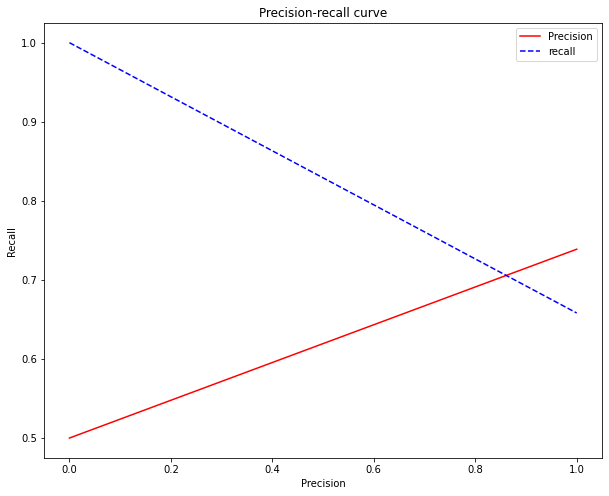

In [ ]:
plt.figure(figsize= (10,8))

def plot_precision_recall_vs_thresholds(precision, recall, thresholds):
  plt.plot(thresholds, precision[:-1], "r-", label = "Precision")
  plt.plot(thresholds, recall[:-1], "b--", label = "recall")
  plt.title("Precision-recall curve")

plot_precision_recall_vs_thresholds(precision, recall, thresholds)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import  plot_roc_curve

fpr_lr, tpr_lr, thresholds = roc_curve(y_train, y_pred_LogReg)

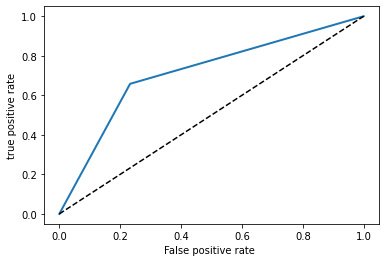

In [ ]:
def roc_auc_curve(fpr,  tpr, label = None):
  plt.plot(fpr, tpr, linewidth = 2,label = label)
  plt.plot([0,1],[0,1], "k--")
  plt.xlabel("False positive rate ")
  plt.ylabel("true positive rate")

roc_auc_curve(fpr = fpr_lr, tpr =  tpr_lr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_pred_LogReg)

0.712740515668501

2. **Naive-Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NBClf_ = GaussianNB()

NBClf_.fit(X_train, y_train)

y_pred_NB = cross_val_predict(NBClf_, X_train, y_train, cv = 10)

print(confusion_matrix(y_train, y_pred_NB))
print("\n")
print(classification_report(y_train, y_pred_NB))

[[136347   1222]
 [129285   8284]]


              precision    recall  f1-score   support

           0       0.51      0.99      0.68    137569
           1       0.87      0.06      0.11    137569

    accuracy                           0.53    275138
   macro avg       0.69      0.53      0.39    275138
weighted avg       0.69      0.53      0.39    275138



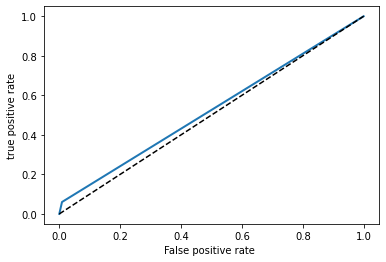

In [ ]:
fpr_nb, tpr_nb, thresholds = roc_curve(y_train, y_pred_NB)

roc_auc_curve(fpr_nb, tpr_nb)

In [ ]:
roc_auc_score(y_train, y_pred_NB)

0.5256671197726231

3. **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=101)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [ ]:
y_pred_tree = cross_val_predict(tree_clf, X_train, y_train, cv = 10)

print(confusion_matrix(y_train, y_pred_tree))
print("\n")
print(classification_report(y_train, y_pred_tree))

[[123690  13879]
 [ 11870 125699]]


              precision    recall  f1-score   support

           0       0.91      0.90      0.91    137569
           1       0.90      0.91      0.91    137569

    accuracy                           0.91    275138
   macro avg       0.91      0.91      0.91    275138
weighted avg       0.91      0.91      0.91    275138



**quite a good improvement compared to logistic regression and Naive bayes classifier.**

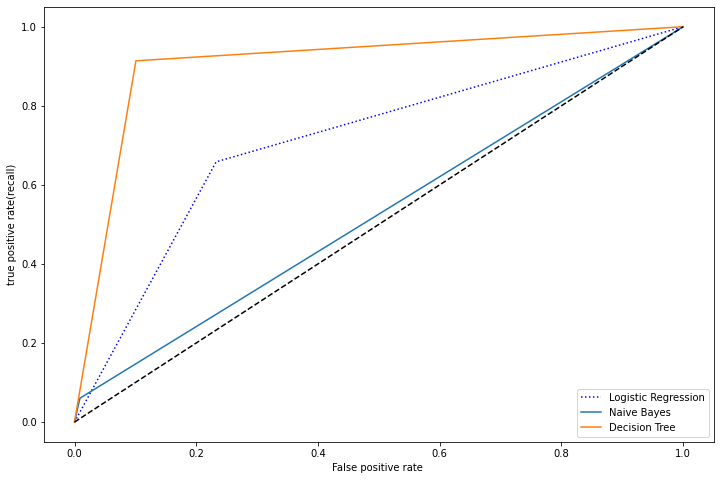

In [ ]:
fpr_tree, tpr_tree, thresholds = roc_curve(y_train, y_pred_tree)


plt.figure(figsize= (12,8))

plt.plot(fpr_lr, tpr_lr, "b:", label = "Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label = "Naive Bayes")
plt.plot(fpr_tree, tpr_tree, label = "Decision Tree")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False positive rate ")
plt.ylabel("true positive rate(recall)")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train, y_pred_tree)

0.9064142357653252

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier()

adaboost_clf.fit(X_train, y_train)



AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
y_pred_ada = cross_val_predict(adaboost_clf, X_train, y_train, cv = 10)

print(confusion_matrix(y_train, y_pred_ada))
print("\n")
print(classification_report(y_train, y_pred_ada))


[[115220  22349]
 [ 24464 113105]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83    137569
           1       0.84      0.82      0.83    137569

    accuracy                           0.83    275138
   macro avg       0.83      0.83      0.83    275138
weighted avg       0.83      0.83      0.83    275138



In [ ]:
fpr_ada, tpr_ada, thresholds = roc_curve(y_train, y_pred_ada)

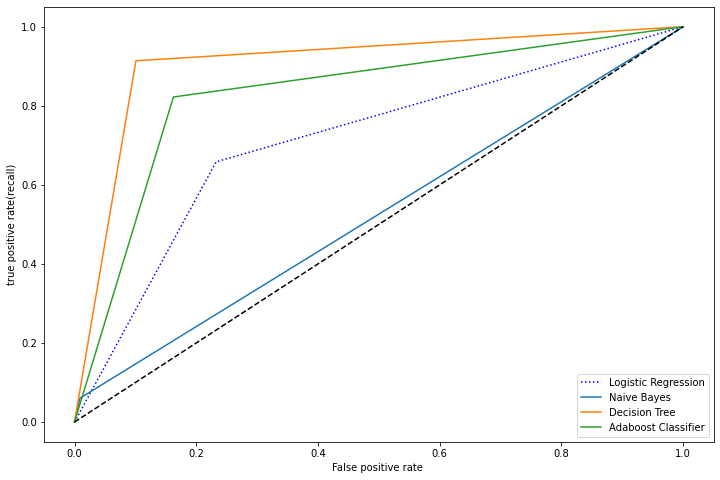

In [ ]:
plt.figure(figsize= (12,8))

plt.plot(fpr_lr, tpr_lr, "b:", label = "Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label = "Naive Bayes")
plt.plot(fpr_tree, tpr_tree, label = "Decision Tree")
plt.plot(fpr_ada, tpr_ada, label = "Adaboost Classifier")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False positive rate ")
plt.ylabel("true positive rate(recall)")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train, y_pred_ada)

0.8298562902979596

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfclf_ = RandomForestClassifier()

rfclf_.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf = cross_val_predict(rfclf_, X_train, y_train, cv = 10)

print(confusion_matrix(y_train, y_pred_rf))
print("\n")
print(classification_report(y_train, y_pred_rf))

[[131016   6553]
 [  8775 128794]]


              precision    recall  f1-score   support

           0       0.94      0.95      0.94    137569
           1       0.95      0.94      0.94    137569

    accuracy                           0.94    275138
   macro avg       0.94      0.94      0.94    275138
weighted avg       0.94      0.94      0.94    275138



In [ ]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_train, y_pred_rf)

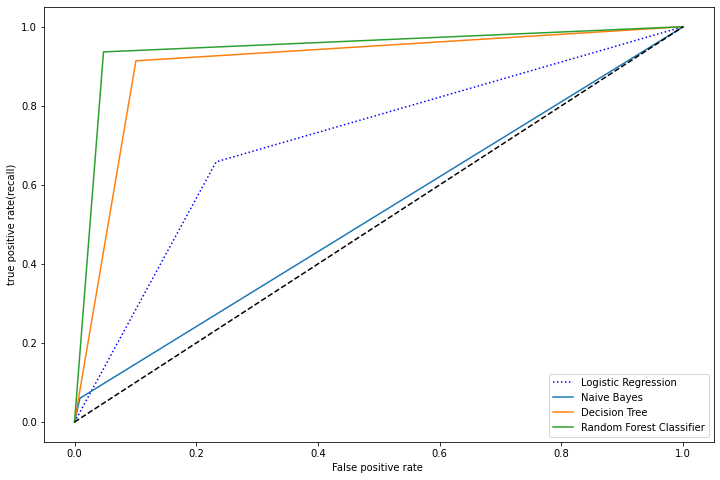

In [ ]:
plt.figure(figsize= (12,8))

plt.plot(fpr_lr, tpr_lr, "b:", label = "Logistic Regression")
plt.plot(fpr_nb, tpr_nb, label = "Naive Bayes")
plt.plot(fpr_tree, tpr_tree, label = "Decision Tree")
plt.plot(fpr_rf, tpr_rf, label = "Random Forest Classifier")
plt.plot([0,1],[0,1], "k--")
plt.xlabel("False positive rate ")
plt.ylabel("true positive rate(recall)")
plt.legend(loc = "lower right")
plt.show()

In [ ]:
roc_auc_score(y_train, y_pred_rf)

0.9442897745858443

**best model so far**...we've got best **Area Under Curve** for Random Forest model

**we will use this model to make predictions on unseen data we have'nt seen so far**

In [ ]:
test_data = pd.read_csv("cs-test.csv")

In [ ]:
test_data.head()

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].mean())
test_data['NumberOfDependents'] = test_data['NumberOfDependents'].fillna(test_data['NumberOfDependents'].median())

In [ ]:
test_data.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
X_test = test_data.drop("SeriousDlqin2yrs", axis =1 )

In [ ]:
y_predicted = pd.DataFrame(rfclf_.predict(X_test))

In [ ]:
test_data['SeriousDlqin2yrs'] = y_predicted

In [ ]:
test_data.head()

In [ ]:
test_data.shape

In [ ]:
sns.countplot(test_data['SeriousDlqin2yrs'], hue = 'SeriousDlqin2yrs', data = test_data,pallette = "RdBu_rr")

In [ ]:
train_delinquency     = train_data[train_data['SeriousDlqin2yrs'] == 1]
train_no_delinquency  = train_data[train_data['SeriousDlqin2yrs'] == 0]

print(train_delinquency.shape, train_no_delinquency.shape)

In [ ]:
test_delinquency     = test_data[train_data['SeriousDlqin2yrs'] == 1]
test_no_delinquency  = test_data[train_data['SeriousDlqin2yrs'] == 0]

print(test_delinquency.shape, test_no_delinquency.shape)

conclusion :**model works super fine on unseen data**